In [31]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import KMeans clutering class
from sklearn.cluster import KMeans

# Import silhouette_score function
from sklearn.metrics import silhouette_score 

## Load the data and apply preprocessing

In [3]:
# load the datasets
sch_stat_df = pd.read_excel('Datasets/scottish_schools_stats.xlsx')
sch_info_df = pd.read_excel('Datasets/scottish_schools_contact.xlsx', sheet_name='Open Schools')
dep_df = pd.read_excel('Datasets/postcode_deprivation.xlsx')

In [4]:
sch_stat_df.head()

,Local Authority,SeedCode,School Name,School Type,Total pupils
0,Aberdeen City,1002929,Brimmond School,Primary,425
1,Aberdeen City,1004247,Countesswells School,Primary,110
2,Aberdeen City,5230420,Riverbank School,Primary,332
3,Aberdeen City,5230624,Westpark School,Primary,242
4,Aberdeen City,5230829,Heathryburn School,Primary,306


In [5]:
sch_stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Local Authority  2461 non-null   object
 1   SeedCode         2461 non-null   int64 
 2   School Name      2461 non-null   object
 3   School Type      2461 non-null   object
 4   Total pupils     2461 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 96.3+ KB


In [6]:
sch_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458 entries, 0 to 2457
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Seed Code                                2458 non-null   int64 
 1   LA Name                                  2458 non-null   object
 2   Centre Type                              2458 non-null   object
 3   School Name                              2458 non-null   object
 4   Address Line1                            2458 non-null   object
 5   Address Line2                            2457 non-null   object
 6   Address Line3                            2458 non-null   object
 7   Post Code                                2458 non-null   object
 8   Unique Property Reference Number (UPRN)  2458 non-null   int64 
 9   Email                                    2458 non-null   object
 10  Phone Number                             2458 non-null   obj

We only need to add Post Codes from contact dataframe to the stats dataframe

In [7]:
sch_info = sch_info_df.rename(columns={'Seed Code' : 'SeedCode'})

In [8]:
sch_df = sch_info.merge(sch_stat_df, on='SeedCode', how='left')

In [9]:
sch_df.head()

,SeedCode,LA Name,Centre Type,School Name_x,Address Line1,Address Line2,Address Line3,Post Code,Unique Property Reference Number (UPRN),Email,...,Primary Department,Secondary Department,Special Department,Gaelic Unit,Integrated Special Unit,Denomination,Local Authority,School Name_y,School Type,Total pupils
0,1002929,Aberdeen City,Local Authority,Brimmond School,Netherhills Place,Bucksburn,ABERDEEN,AB21 9DF,9051145398,brimmondschool@aberdeencity.gov.uk,...,Yes,No,No,No,Yes,Non-denominational,Aberdeen City,Brimmond School,Primary,425.0
1,1004140,Aberdeen City,Local Authority,Orchard Brae School,Howes Road,0,ABERDEEN,AB16 7RH,9051129833,OrchardBraeSchool@aberdeencity.gov.uk,...,No,No,Yes,No,No,Non-denominational,Aberdeen City,Orchard Brae School,Special,129.0
2,1004166,Aberdeen City,Local Authority,Lochside Academy,Wellington Circle,Altens,ABERDEEN,AB12 3JG,9051148374,nehendry@aberdeencity.gov.uk,...,No,Yes,No,No,No,Non-denominational,Aberdeen City,Lochside Academy,Secondary,1138.0
3,1004247,Aberdeen City,Local Authority,Countesswells School,Airyhall School,Countesswells Road,ABERDEEN,AB15 8AD,9051018828,CountesswellsSchool@aberdeencity.gov.uk,...,Yes,No,No,No,No,Non-denominational,Aberdeen City,Countesswells School,Primary,110.0
4,5230420,Aberdeen City,Local Authority,Riverbank School,Dill Road,Tillydrone,ABERDEEN,AB24 2XL,9051054562,riverbank@aberdeencity.gov.uk,...,Yes,No,No,No,Yes,Non-denominational,Aberdeen City,Riverbank School,Primary,332.0


In [10]:
sch_df.columns

Index(['SeedCode', 'LA Name', 'Centre Type', 'School Name_x', 'Address Line1',
       'Address Line2', 'Address Line3', 'Post Code',
       'Unique Property Reference Number (UPRN)', 'Email', 'Phone Number',
       'Website Address', 'Pre-school Department', 'Primary Department',
       'Secondary Department', 'Special Department', 'Gaelic Unit',
       'Integrated Special Unit', 'Denomination', 'Local Authority',
       'School Name_y', 'School Type', 'Total pupils'],
      dtype='object')

In [11]:
columns_to_remove = ['School Name_y', 'Centre Type', 'Address Line1',
       'Address Line2', 'Address Line3', 'Unique Property Reference Number (UPRN)', 'Email', 'Phone Number',
       'Website Address', 'Pre-school Department', 'Primary Department',
       'Secondary Department', 'Special Department', 'Gaelic Unit',
       'Integrated Special Unit', 'Denomination', 'Local Authority']


sch_df.drop(columns=columns_to_remove, inplace=True)
sch_df = sch_df.rename(columns={'School Name_x' : 'School Name'})
sch_df = sch_df.rename(columns={'LA Name' : 'Local Authority'})

In [12]:
sch_df.head()

,SeedCode,Local Authority,School Name,Post Code,School Type,Total pupils
0,1002929,Aberdeen City,Brimmond School,AB21 9DF,Primary,425.0
1,1004140,Aberdeen City,Orchard Brae School,AB16 7RH,Special,129.0
2,1004166,Aberdeen City,Lochside Academy,AB12 3JG,Secondary,1138.0
3,1004247,Aberdeen City,Countesswells School,AB15 8AD,Primary,110.0
4,5230420,Aberdeen City,Riverbank School,AB24 2XL,Primary,332.0


In [13]:
# create a function to return the deprivation value
def get_dep(pos):
    try:
        dep_value = dep_df[dep_df['Postcode'] == pos]['SIMD2020v2_Quintile'].values[0]
        return dep_value
    
    except:
        return None

In [14]:
# Add the deprivaion quintile value for each school
sch_df['Deprivation Quintile'] = list(map(get_dep, sch_df['Post Code']))

In [15]:
sch_df[sch_df['School Type'].isnull()]

,SeedCode,Local Authority,School Name,Post Code,School Type,Total pupils,Deprivation Quintile
32,5240042,Aberdeen City,Virtual School,AB10 1AB,NaN,NaN,3.0
54,5245842,Aberdeen City,Hospital & Home Tuition Service,AB25 2ZG,NaN,NaN,4.0
378,5700248,Clackmannanshire,Primary School Support Service,FK10 2SD,NaN,NaN,1.0
404,1004840,Dumfries & Galloway,D&G Primary Central & East Inclusion Hub,DG2 0DY,NaN,NaN,3.0
405,1004859,Dumfries & Galloway,D&G Primary West Inclusion Hub,DG8 6PE,NaN,NaN,2.0
483,5940842,Dumfries & Galloway,D&G Secondary Inclusion Support,DG2 9AW,NaN,NaN,1.0
614,1003062,East Dunbartonshire,East Dunbartonshire Central School,G66 1NH,NaN,NaN,1.0
643,8338744,East Dunbartonshire,Secondary Wellbeing,G66 1XD,NaN,NaN,1.0
662,1005685,East Lothian,Craighall Primary School,EH21 6UL,NaN,NaN,4.0
663,1005693,East Lothian,Blindwells Primary School,EH32 0BX,NaN,NaN,3.0


In [16]:
sch_df = sch_df.dropna()

## Visualisation

In [17]:
sch_df.groupby('School Type').sum()['Total pupils'].values

array([383331., 302253.,   7145.])

In [18]:
list(sch_df.groupby('School Type').sum().index)

['Primary', 'Secondary', 'Special']

In [19]:
sch_df.groupby('School Type').mean(numeric_only=True)['Deprivation Quintile']

School Type
Primary      2.862278
Secondary    3.205128
Special      2.276190
Name: Deprivation Quintile, dtype: float64

In [20]:
sch_df.groupby('School Type').count()['School Name']

School Type
Primary      1975
Secondary     351
Special       105
Name: School Name, dtype: int64

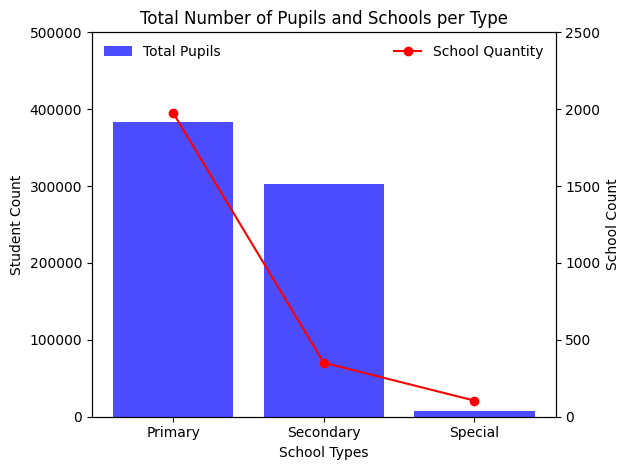

In [21]:
# Sample data for student count and school count for three different school types
school_types = list(sch_df.groupby('School Type').sum().index)
pupils_count = sch_df.groupby('School Type').sum()['Total pupils'].values
school_count = sch_df.groupby('School Type').count()['School Name'].values

# Create a figure and axis
fig, ax1 = plt.subplots()

# Create the bar chart for student count
ax1.bar(school_types, pupils_count, color='b', alpha=0.7, label='Total Pupils')
ax1.set_xlabel('School Types')
ax1.set_ylabel('Student Count')
ax1.set_ylim(0,500000)
ax1.tick_params(axis='y')

# Create a second y-axis on the right for school count
ax2 = ax1.twinx()
ax2.plot(school_types, school_count, color='r', marker='o', label='School Quantity')
ax2.set_ylabel('School Count')
ax2.set_ylim(0,2500)
ax2.tick_params(axis='y')

# Add legends
ax1.legend(loc='upper left', frameon=False)
ax2.legend(loc='upper right', frameon=False)

# Set a title
plt.title('Total Number of Pupils and Schools per Type')

# Show the plot
plt.tight_layout()
plt.show()

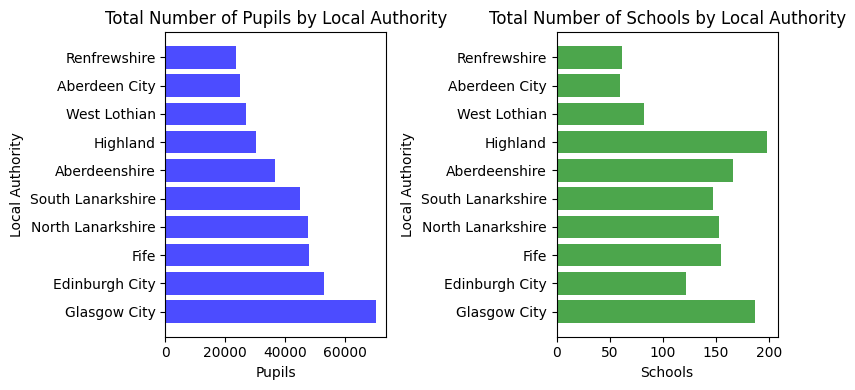

In [22]:
# Sample data (replace with your actual data)
data = {
    'LocalAuthority': list(sch_df.groupby('Local Authority').count().index),
    'Schools': sch_df.groupby('Local Authority').count()['School Name'],
    'Pupils': sch_df.groupby('Local Authority').sum()['Total pupils'],
}

df = pd.DataFrame(data)
df = df.sort_values(by=['Pupils'], ascending=False)[:10]
# Set the figure size
plt.figure(figsize=(8, 4))

# Create a subplot with 1 row and 2 columns for side-by-side bar charts
plt.subplot(1, 2, 1)

# Create horizontal bar chart for the total number of pupils
plt.barh(df['LocalAuthority'], df['Pupils'], color='b', alpha=0.7)
plt.xlabel('Pupils')
plt.ylabel('Local Authority')
plt.title('Total Number of Pupils by Local Authority')


# Create a subplot for the second bar chart
plt.subplot(1, 2, 2)

# Create horizontal bar chart for the total number of Pupils
plt.barh(df['LocalAuthority'], df['Schools'], color='g', alpha=0.7)
plt.xlabel('Schools')
plt.ylabel('Local Authority')
plt.title('Total Number of Schools by Local Authority')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


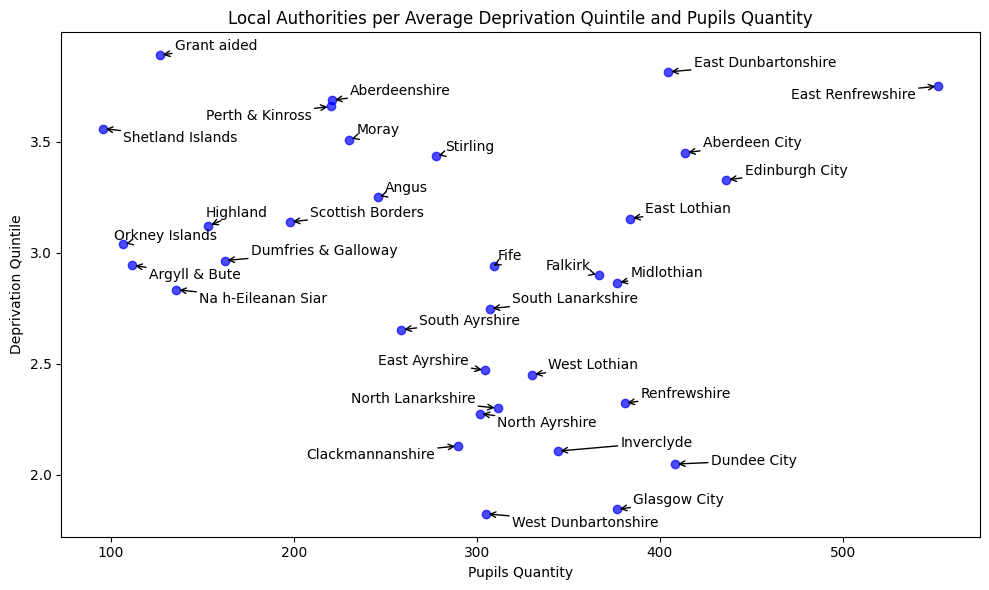

In [25]:
from adjustText import adjust_text

# Sample data (replace with your actual data)
data = {
    'LocalAuthority': sch_df.groupby('Local Authority').mean(numeric_only=True).index,
    'Pupils': sch_df.groupby('Local Authority').mean(numeric_only=True)['Total pupils'],
    'DeprivationScore': sch_df.groupby('Local Authority').mean(numeric_only=True)['Deprivation Quintile'],
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Pupils'], df['DeprivationScore'], label='LocalAuthority', c='b', alpha=0.7)

# Set labels and title
plt.xlabel('Pupils Quantity')
plt.ylabel('Deprivation Quintile')
plt.title('Local Authorities per Average Deprivation Quintile and Pupils Quantity')


# Annotate and adjust labels to prevent overlap
texts = [plt.text(row['Pupils'], row['DeprivationScore'], row['LocalAuthority'], fontsize=10) for _, row in df.iterrows()]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black'), force_text=0.1, expand_points=(1.3, 1.3))


# Show the plot
plt.tight_layout()
plt.show()


In [27]:
numeric_columns = ['Pupils', 'DeprivationScore']

In [28]:
# Import standard scaler to z-score normalize the data
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Scale the numeric columns
scaled_values = scaler.fit_transform(df[numeric_columns])

# Sonvert the numpy array of scaled values into a dataframe
scaled_values = pd.DataFrame(scaled_values, columns = numeric_columns)

# Describe the scaled columns: each has 0 mean and 1 standard deviation
scaled_values.describe().round(2)

,Pupils,DeprivationScore
count,33.00,33.00
mean,0.00,-0.00
std,1.02,1.02
min,-1.75,-1.87
25%,-0.61,-0.80
50%,0.17,0.04
75%,0.83,0.87
max,2.45,1.65


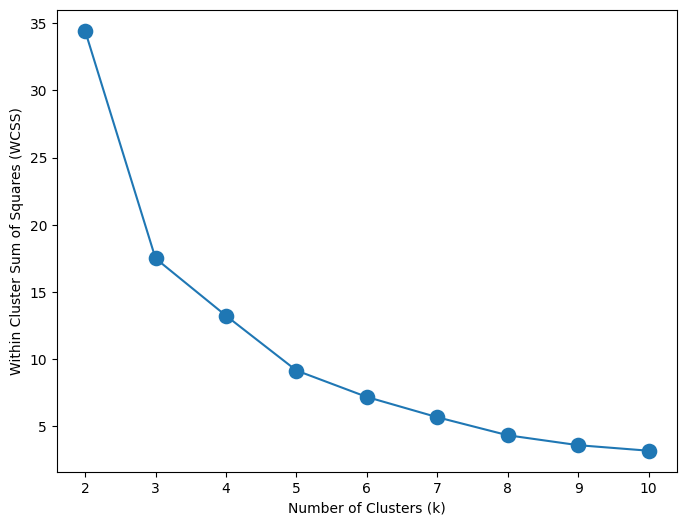

In [32]:

# Using Within-Cluster Sum of Squares (WCSS) to observe the best K from the chart

# Create a list to store WCSS values
wcss = []

# Iterate in a range from 2 to 10, inclusive
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234) # Create a cluster object for each k
    km.fit(scaled_values) # Fit the scaled data
    wcss.append(km.inertia_) # Add the inertia score to wcss list

# Convert the wcss list into a pandas series object
wcss_series = pd.Series(wcss, index = range(2, 11))

# Draw a line chart showing the inertia score, or WCSS, for each k iterated
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

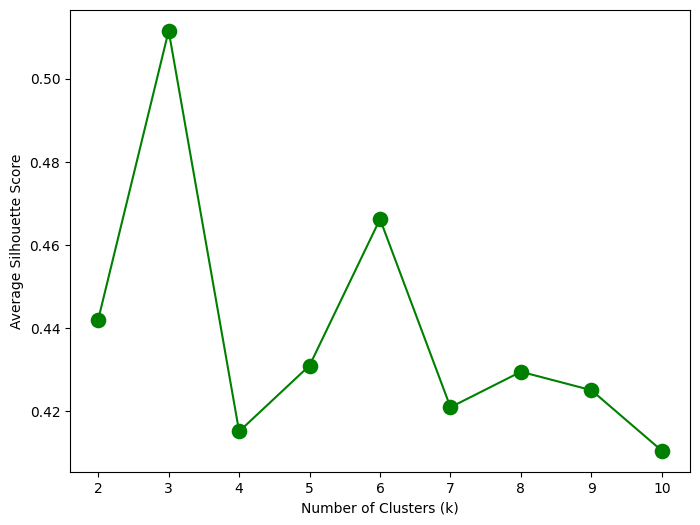

In [33]:
# Using Average Silhouette Method to determine the best K


# Create a list to store silhouette values
silhouette = []

# Iterate in a range from 2 to 10, inclusive
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234) # Create a cluster object for each k
    km.fit(scaled_values) # Fit the scaled data
    silhouette.append(silhouette_score(scaled_values, km.labels_)) # Add the silhouette score to silhouette list

# Convert the silhouette list into a pandas series object
silhouette_series = pd.Series(silhouette, index = range(2, 11))

# Draw a line chart showing the average silhouette score for each k iterated
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index, color='green')
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150, color='green')
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

In [36]:
# Create kmeans object
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

# Fit the scaled values
km.fit(scaled_values)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [43]:
# Check out how many players each cluster possesses
for index in range(len(pd.Series(km.labels_).value_counts())):
    print('Cluster',pd.Series(km.labels_).value_counts().sort_index().index[index],'has',
          pd.Series(km.labels_).value_counts().sort_index()[index],'schools')

Cluster 0 has 5 schools
Cluster 1 has 15 schools
Cluster 2 has 13 schools


In [38]:
# Create a dataframe storing cluster centers for each column
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = numeric_columns)

In [39]:
# Add the cluster indicator for every single player in the dataset
df['cluster'] = km.labels_.tolist()

In [40]:
# Group the dataframe by the cluster indicators
df.groupby('cluster').mean(numeric_only=True).round(2)

,Pupils,DeprivationScore
cluster,,
0,438.29,3.50
1,331.48,2.39
2,175.87,3.31


In [44]:
df[df['cluster'] == 2]

,LocalAuthority,Pupils,DeprivationScore,cluster
Local Authority,,,,
Aberdeenshire,Aberdeenshire,221.060241,3.686747,2
Angus,Angus,245.857143,3.250000,2
Argyll & Bute,Argyll & Bute,111.863636,2.943182,2
Dumfries & Galloway,Dumfries & Galloway,162.298246,2.964912,2
Grant aided,Grant aided,127.000000,3.888889,2
Highland,Highland,153.459596,3.121212,2
Moray,Moray,230.320755,3.509434,2
Na h-Eileanan Siar,Na h-Eileanan Siar,135.875000,2.833333,2
Orkney Islands,Orkney Islands,106.923077,3.038462,2
